In [1]:
import numpy as np
import sklearn.datasets as ds
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
digits = ds.load_digits()
X = digits.data
y = digits.target.copy()

In [3]:
y[digits.target ==9 ] = 1
y[digits.target !=9 ] = 0

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
log_res = LogisticRegression()
log_res.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
decision_score = log_res.decision_function(X_test)

In [7]:
minScore = np.min(decision_score)
maxScore = np.max(decision_score)

In [8]:
minScore, maxScore

(-85.69968682080051, 19.858547724195706)

In [9]:
thresholds = np.arange(minScore, maxScore, 0.1)

In [10]:
precisionScore = []
recallScore = []
for threshold in thresholds:
    y_predict = np.array(decision_score >= threshold, dtype="int")
    precision_score(y_test, y_predict)
    precisionScore.append(precision_score(y_test, y_predict))
    recallScore.append(recall_score(y_test, y_predict))


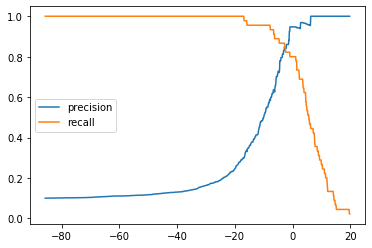

In [11]:
# 精确率和召回率成反比
plt.plot(thresholds, precisionScore, label="precision")
plt.plot(thresholds, recallScore, label="recall")
plt.legend()
plt.show()

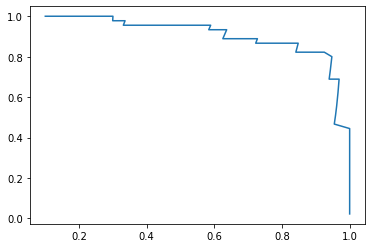

In [12]:
plt.plot(precisionScore, recallScore)

### scikit-learn中的Precision-Recall曲线

In [13]:
from sklearn.metrics import precision_recall_curve

In [14]:
precision, recall, thresholds = precision_recall_curve(y_test, decision_score)

In [15]:
precision.shape, recall.shape, thresholds.shape

((151,), (151,), (150,))

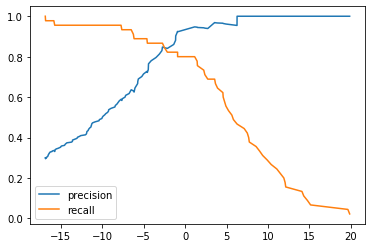

In [16]:
plt.plot(thresholds, precision[:-1], label="precision")
plt.plot(thresholds, recall[:-1], label="recall")
plt.legend()
plt.show()

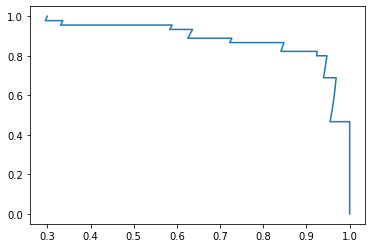

In [17]:
plt.plot(precision, recall)